#  Chandan  G Y
# Machine Learning Project on Crop Recommendation Using Environmental Factors and soil condition


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Importing data file

In [2]:
df=pd.read_csv("D:/data science projects/crop recommendation project/crop_data.csv")

In [3]:
df

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin


In [4]:
df1=df.drop('CROP_PRICE',axis=1)
df1

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,Black pepper
...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,Pumpkin


### Checking any presence of null values in the dataframe

In [5]:
df.isnull().sum()

STATE          0
SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64

In [6]:
df['STATE'].value_counts()

Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: STATE, dtype: int64

### Assainging dummy variables to the qualitative variables in the df by using LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

### Assaigning for STATE column of df

In [8]:
df['state']=le.fit_transform(df['STATE'])

In [9]:
df['STATE'].value_counts()

Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh       102
Odisha                  86
Haryana                 65
Assam                   58
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: STATE, dtype: int64

### From this above and below value_counts() of qualitative variables column 'STATE' and quantitative variables  column 'state' , we can see that there are 574 number of data is available for Uttar pradesh and similarly, from below we can see that LabelEncoder as assaingned quantitative values to each state in the range of 0 to 25 for all 26 states, as we can see Uttar pradesh as 23, Kerala as 10, Tamil nadu as 20 and so on.

In [10]:
df['state'].value_counts()

23    574
10    274
20    183
18    180
12    162
25    124
5     113
7     102
16     86
6      65
2      58
13     52
11     44
19     41
9      36
24     21
22     18
21     15
0      15
1       7
17      7
14      6
15      6
3       5
8       3
4       3
Name: state, dtype: int64

### Similarly, assaing quantitative variables to SOIL_TYPE

In [11]:
df['soil_type']=le.fit_transform(df['SOIL_TYPE'])

In [12]:
df['SOIL_TYPE'].value_counts()

Alluvial soil      742
Sandy Clay loam    274
Desert soil        245
Laterite soil      244
Regur soil         162
Red soil           144
Desert soils       113
Sandy loam         102
Inceptisols         58
Black soil          44
Sandy soil          33
Mountain soil.      21
Delta alluvium       7
Loamy soil           6
Clayey soils         5
Name: SOIL_TYPE, dtype: int64

### We can see Alluvial soil is assaigned as 0, sandy clay loam as 12 desert soil as 4 and so on.

In [13]:
df['soil_type'].value_counts()

0     742
12    274
4     245
7     244
11    162
10    144
5     113
13    102
6      58
1      44
14     33
9      21
3       7
8       6
2       5
Name: soil_type, dtype: int64

### Now drop the qualitative variables from df

In [14]:
df1=df.drop(['SOIL_TYPE','STATE','CROP_PRICE'],axis=1)

In [15]:
df1

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP,state,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Amaranthus,0,14
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Green Banana,0,14
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Ladies Finger,0,14
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Bitter Gourd,0,14
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Black pepper,0,14
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Onion,25,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Papaya,25,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Potato,25,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Pumpkin,25,0


### Visualize the data to find out any relationship between the continuous variables

In [16]:
import seaborn as sns

In [17]:
df2=df1[['ph','RAINFALL','HUMIDITY','TEMPERATURE','N_SOIL','P_SOIL','K_SOIL']]

### Drawing a pair plot for each of continuous variables

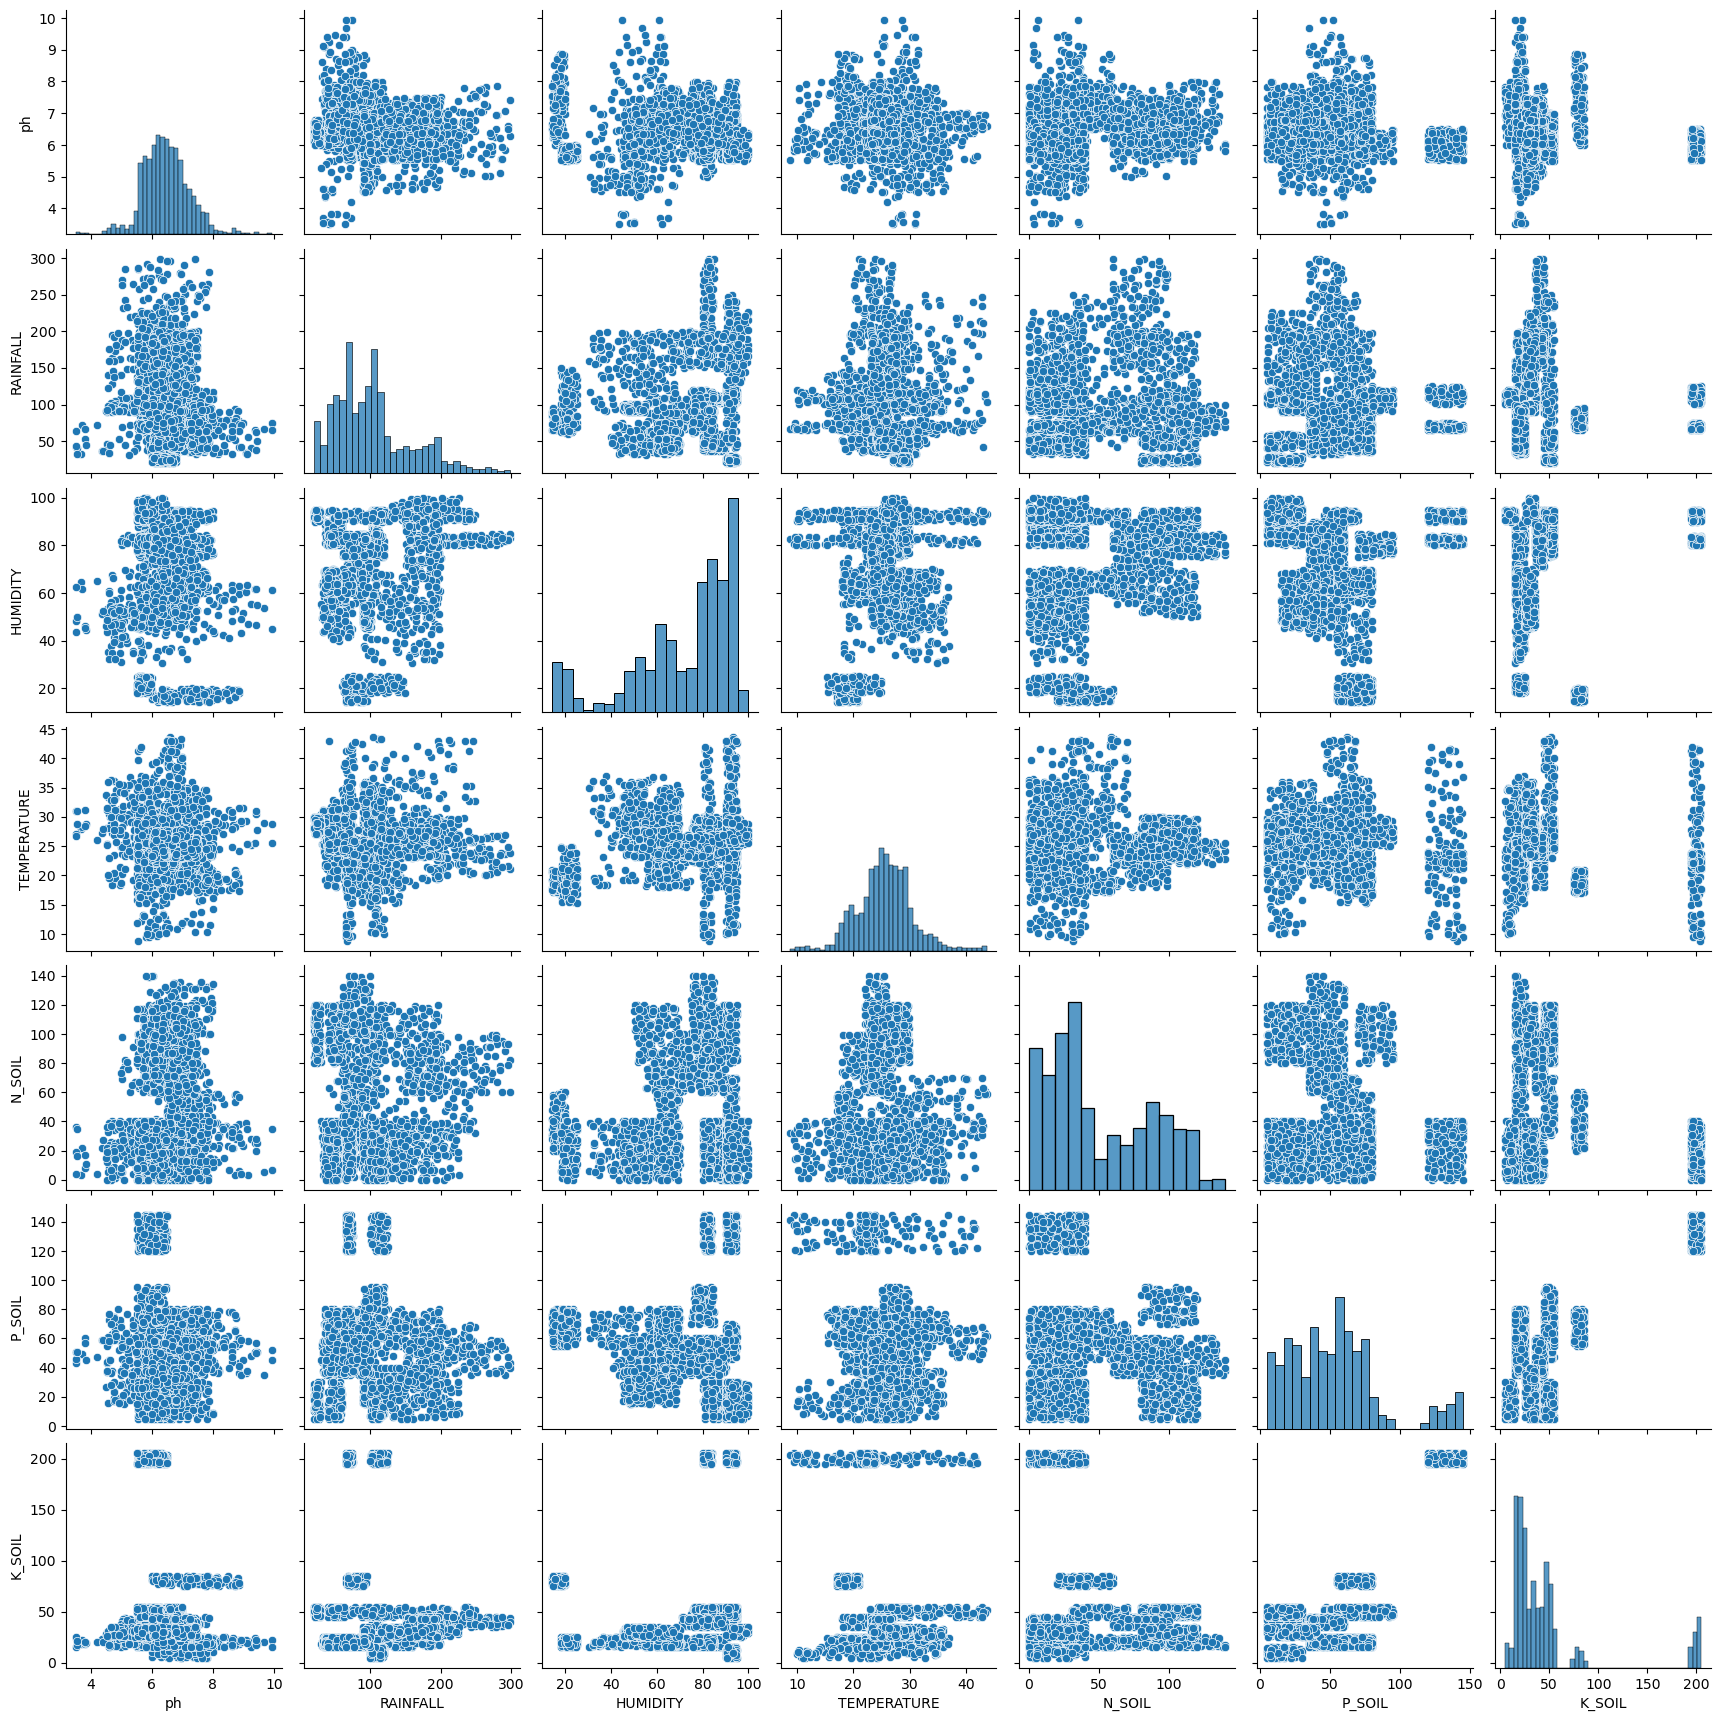

In [18]:
sns.pairplot(df2)
plt.show()

### Drawing a correlation heatmap for easy identification of correlation coeffecient between pairs of continuous variables. It help full to know which two variables are highly correlated

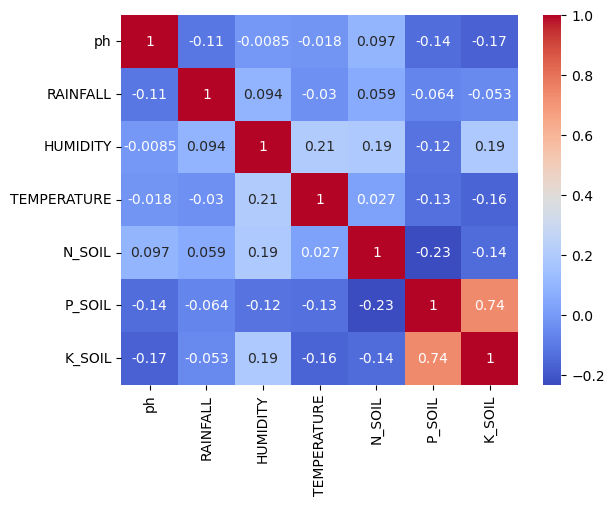

In [19]:
corr_matrix = df2.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Drawing box plot to identify outliers, to see the the range of data points distributed

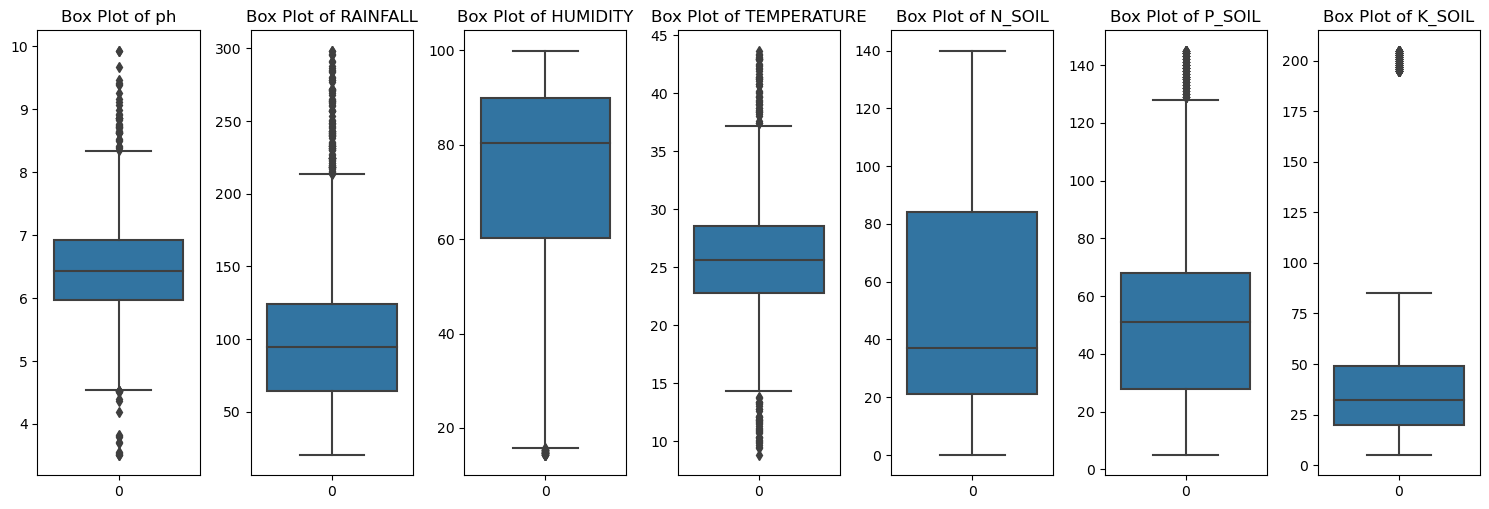

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=len(df2.columns), figsize=(15, 5))

for i, column in enumerate(df2.columns):
    sns.boxplot(data=df2[column], ax=axes[i], orient='v')
plt.tight_layout()

for i, column in enumerate(df2.columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()

### Similar to the box plot, violin plot is drawn here

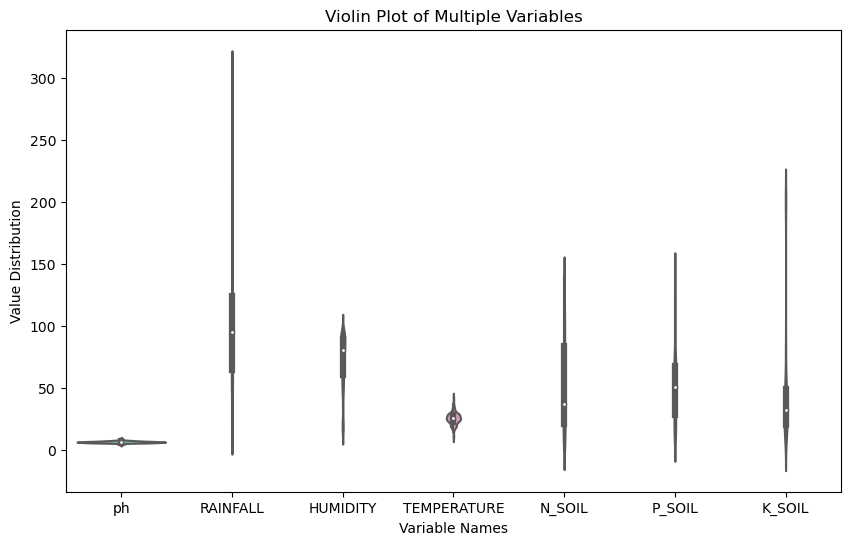

In [21]:
plt.figure(figsize=(10, 6))  
sns.violinplot(data=df2, orient='v', palette='Set2')  

plt.xlabel('Variable Names')
plt.ylabel('Value Distribution')
plt.title('Violin Plot of Multiple Variables')
plt.show()

### Drawing histogram to know about distribution of the variables, continuous or discreat variables.

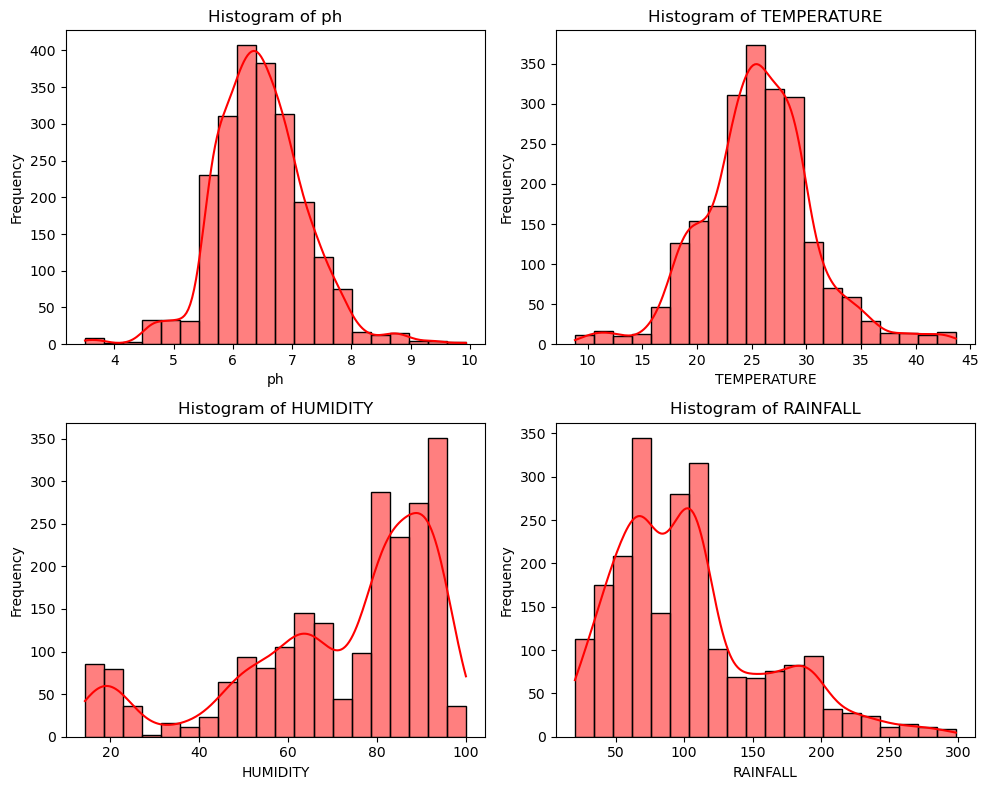

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  

axes = axes.flatten()
variables_to_plot = ['ph', 'TEMPERATURE', 'HUMIDITY', 'RAINFALL']

for i, variable in enumerate(variables_to_plot):
    ax = axes[i]
    sns.histplot(data=df2, x=variable, bins=20, kde=True, color='red', ax=ax)
    ax.set_title(f'Histogram of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Now assaign the x and y parameters for fiiting the desirable models.

In [23]:
x=df1.drop(['CROP'],axis=1)

In [24]:
x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,state,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,14
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,14
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,14
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,14
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,14
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,25,0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,25,0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,25,0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,25,0


In [25]:
y=df1[['CROP']]

### Now import train test split for dividing df into training and testing part

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Importing random forest model and fitting

In [28]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators=20)

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
rand.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

### Accuracy of  model on the training dataset

In [31]:
rand.score(x_train,y_train)

1.0

In [32]:
rand.score(x_test,y_test)

0.06136363636363636

#### it indicates model is 99% accurate on training data and here i have predicted the suitable crop based on provided input parameters as (nitrogen-85, phosphorus-40, potassium-25, temp-24, humidity-80, pH-7, rainfall-250,state(karnataka) as assaigned as 9, soil_type (red soil) as assaigned as 10)

In [33]:
rand.predict([[85,40,25,24,80,7,250,9,10]])

array(['Carrot'], dtype=object)

##### the result shows the Tomato crop can be Recommend for this climatic condition

In [34]:
from sklearn import tree
model=tree.DecisionTreeClassifier() 

### Similarly i have imported Decision Tree model 

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(x_train,y_train)

1.0

#### Here i have used Decision Tree model, fitted with training data, its gives an accuracy of 100%, also i have predicted for some parameters in kerala, it recommended the coconut crop for this climate.

In [37]:
model.predict([[85,40,25,24,80,7,250,10,14]])

array(['Tomato'], dtype=object)

###  Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter=100, random_state=42) 

In [39]:
logistic_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

####  Logistic Regression model gives accuracy of 9.5%, indicates the model is not fitting accuratly on training dataset

In [40]:
logistic_reg.score(x_train,y_train)

0.09204545454545454

### Support vector machine

In [41]:
from sklearn.svm import SVC

In [42]:
svm = SVC(kernel='linear')

In [ ]:
svm.fit(x_train, y_train)

#### SVM gives an accuracy score of 19.9% indicates poor in model training, but better than LogisticRegression

In [ ]:
svm.score(x_train, y_train)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train, y_train)

#### KNN gives an accuracy of 25% for fitting on training data and compare to SVM, KNN is better in fitting on training data

In [ ]:
knn.score(x_train, y_train)

#### Here also i predicted crop using the same parameters of random forest, it recommended the arecanut crop for that region

In [ ]:
knn.predict([[85,40,25,24,80,7,250,9,10]])

##### the result shows the Arecanut crop can be Recommend for this climatic condition, as a i am from chikkmanglore district of karnataka, this climatic condition exist in our region, in karnataka highest arecanut grown area includes shivamogga, chikkmanglore, udupi, davangere etc.

### Now its time to know the accuracy of the model on predected data, for this i have used the decision tree classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42) 

# Fit the model to the training data
dt=decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier Accuracy: {accuracy}')


In [ ]:
from sklearn.metrics import hamming_loss

# Calculate the Hamming Loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hamming_loss_value}')

## conclusion: 

#### The Decision Tree Classifier exhibits lower prediction accuracy and a higher Hamming loss. This suggests that the models are 
#### well-fitted to the training dataset. While the decision tree outperforms Random Forest, KNN, SVM and Logistic Regression in 
#### training, it shows reduced accuracy in making predictions. This leads us to the conclusion that for this dataset, deep learning 
#### models may be necessary for further analysis due to the complexity of data